<h3> Introduction to Naive Bayes </h3>

A naive bayes classifier assigns labels to observations using a process based on Bayes' theorem. The important element of the theorem is updating the probability of an event based on the known prior events. For instance, if all vehicles with 2 wheels are motorcycles, then we can update the probability that an unknown vehicle is a motorcycle given whether we know it has two wheels. In the case of a classification algorithm, the prosterior probabilities in question are the likelihoods that a given observation belongs to each class. Using the known prior events to update the probability of each class, the algorithm would take whichever class label had the highest likelihood and assign that to the data point in question. 

A naive Bayes classifier has several variants based on the types of features being used to predict class labels.
- Gaussian: If the predictors are continuous, then we likely will not have exact probabilities for the given input point (as no other point may have the exact same value for all input features). As such, a different approach is required, where it is assumed that the continuous attributes are normally distributed. Then, for a given point that needs to be classified, we can express the probability of it belonging to a certain class as the likelihood that the point came from each class's distribution. This is relatively easy, as we can simply find the likelihood that the point was generated by each class distribution, and assign the most likely one as the label.
- Multinomial: This method is preferred when the predictors are generated by a multinomial distribution, meaning they are discrete, with more than 2 levels. Labels would be assigned to new observations based on the conditional probability of observing the point's attributes given that it came from each class (which can be calculated again using Baye's theorem since the attributes are discirete).
- Bernoulli Naive Bayes: The Bernoulli method is preferred when the predictors are binary, meaning they are discrete but only have two values they can take. This is calculated similar to the multinomial variant, but is even more straightforwards as there are only two classes.


<h3> Naive Bayes for Retail Investor Activity </h3>

Objective of Naive Bayes for my Project: With my Naive Bayes classifier, I hope to identify stocks in the top 10 by retail investor activity that have increases in retail investor activity on a given day. To do this I will convert a continuous variable (the daily change in retail investor activity) into two classes based on whether a given stock increased or decreased in activity day-over-day. 


To predict this outcome variable for each stock in the top 10, I will use two different sets of predictors in the Naive Bayes classifier. First, I will use my tabular data:
- Individual investor sentiment from the proceding week, including the percent of respondents who were bearish, bullish, and neutral on the market.
- The popularity ranking and change in ranking of each stock on the platform stocktwits.
- Tabular data from reddit posts including the number of comments.   
Second, I will use my textual data to predict the same increase/decrease outcome variable:
- A corpus of 7.5k reddit posts mentioning top-10 tickers, which contain about 50,000 unique words. 


<h2> Prep Data for Naive Bayes </h2>

We are splitting the data into training, validation, and test sets to ensure we optimally fit the model and avoid over or under fitting. In particular, we can use the validation set to tune our model and improve its generalizability, and then use the test set to evaluate the performance of our model. I will do a 70-15-15 split between the train, evaluation, and test data, and this is done simply by randomly splitting the dataset.

For the text data: I will prepare the corpus in a few steps. 
1. I have already used a stemmer to reduce the number of unique words by about 7,000. After this reduction we still have 50,000 words.
2. I will filter out words with <5 total uses in the corpus.
3. Then, I will join my binary outcome variable with the reddit text data according to the date of each post. The outcomes will be lagged by 1 day, as we want to ensure that the reddit mentions preceeded the change in a stock's trading activity. As an example of how this will work: the outcome variable for a post that mentioned ticker QQQ on 12/1 would be 1 or 0 depending on whether QQQ increased or decreased in activity on 12/2. 
4. Next, I will    

In [30]:
from sklearn.model_selection import train_test_split
import csv
import pandas as pd
import os

os.getcwd()

dataIn = pd.read_csv('../../../data/01-modified-data/joinedSentiment.csv')

print(dataIn['deltaActivity'] == 0)




0       False
1       False
2        True
3       False
4       False
        ...  
9555    False
9556    False
9557    False
9558    False
9559    False
Name: deltaActivity, Length: 9560, dtype: bool
   Unnamed: 0     X      date.x ticker  activity  sentiment  deltaActivity  \
0           1  9551  2020-01-02   TSLA    0.0226          0        -0.0014   
1           2  9552  2020-01-02    SPY    0.0147          3        -0.0341   
2           3  9553  2020-01-02   ROKU    0.0119          0         0.0000   
3           4  9554  2020-01-02    QQQ    0.0093          6        -0.0111   
4           5  9555  2020-01-02   MSFT    0.0116          2        -0.0181   

   deltaSentiment  newEntry  week.x  ... Neutral Bearish  Total  X8.week  \
0               0     False       1  ...     NaN     NaN    NaN      NaN   
1              -7     False       1  ...     NaN     NaN    NaN      NaN   
2               0      True       1  ...     NaN     NaN    NaN      NaN   
3               1     Fals

<h2> Feature selection for record data </h2>

Let's split the text data.

<h2> Naive Bayes with Labeled Record Data </h2>

In [2]:
# Let's read in our vectorized data from reddit
textsIn = pd.read_csv('../../../data/01-modified-data/vectorizedReddit.csv')

# Double check shape
print(textsIn.shape)


(7436, 49692)


In [8]:
# Check columns are sorted by occurence
print(textsIn.sum(axis=0))

# Looks like it is sorted in the proper order

# How many columns are for a word that is only used once?
s = textsIn.sum(axis=0)
textsIn=textsIn[ s.index[s != 1]   ]
print(textsIn.head())




date_utc    2020-07-302020-09-152022-01-032021-11-122020-0...
title       Sample ETF portfolioPsycho Market Recap - Tue ...
ticker      QQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQQ...
comments                                            1065358.0
00                                                       4387
                                  ...                        
ïif                                                         1
ïred                                                        1
ïthere                                                      1
ïyou                                                        1
üü                                                          1
Length: 49692, dtype: object
Index(['date_utc', 'title', 'ticker', 'comments', '00', '000', '00000',
       '000000000', '000001', '0000050863',
       ...
       'zyne', 'zynerba', 'zynex', 'zynga', 'zypot4g', 'zyq8gpy', 'zyxi',
       'zzhq7gy', 'zzpcoa9', 'zzqa2sj'],
      dtype='object', length=35405)
     date_u

In [47]:
# How big a change was removing single-use words?
textsIn.shape
# After removing words only used once,  we have 35k words
print(dataIn.head)


# Now, lets try and fit the GNB

# We will need to merge in the activity change data, lagged by one day
from datetime import datetime, timedelta

dataIn['date.x'] = dataIn['date.x'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())



dataIn['date.x'] = dataIn['date.x'] - timedelta(days = 1)





<bound method NDFrame.head of       Unnamed: 0     X      date.x ticker  activity  sentiment  deltaActivity  \
0              1  9551  2020-01-02   TSLA    0.0226          0        -0.0014   
1              2  9552  2020-01-02    SPY    0.0147          3        -0.0341   
2              3  9553  2020-01-02   ROKU    0.0119          0         0.0000   
3              4  9554  2020-01-02    QQQ    0.0093          6        -0.0111   
4              5  9555  2020-01-02   MSFT    0.0116          2        -0.0181   
...          ...   ...         ...    ...       ...        ...            ...   
9555        9556     6  2023-10-18   NVDA    0.0695          2         0.0428   
9556        9557     7  2023-10-18   META    0.0124          1        -0.0064   
9557        9558     8  2023-10-18   AMZN    0.0185          6        -0.0016   
9558        9559     9  2023-10-18    AMD    0.0264          2         0.0025   
9559        9560    10  2023-10-18   AAPL    0.0255          5        -0.0204  

In [97]:
# Now we subtracted one day, let's add the categorical label variable we are trying to predict and then split the data

dataIn['activityIncrease'] = dataIn['deltaActivity'].apply(lambda x: int(x > 0) )
# Change percent signs to decimals
dataIn['Bearish'] = dataIn['Bearish'].apply(lambda x: x.rstrip("%").astype(float)/100)
dataIn['Bullish'] = dataIn['Bullish'].apply(lambda x: x.rstrip("%").astype(float)/100)
dataIn['Neutral'] = dataIn['Neutral'].apply(lambda x: x.rstrip("%").astype(float)/100)
dataIn['Spread'] = dataIn['Spread'].apply(lambda x: x.rstrip("%").astype(float)/100)




AttributeError: 'float' object has no attribute 'rstrip'

In [100]:
# Now that we subtracted one day in the cell above, let's merge the text corpus with the daily activity label

textsIn = pd.DataFrame(textsIn)
textsIn['date_utc'] = textsIn['date_utc'].apply(lambda x: datetime.strptime(x, '%Y-%m-%d').date())

processed = pd.merge(dataIn, textsIn, how = 'left', left_on = ['date.x', 'ticker'], right_on = ['date_utc', 'ticker'] )



In [101]:
# now let's check that our merge worked and then split into test, training, and validation
#print(processed.iloc[:,range(15,25)].head)

#print(processed.isna().sum() < processed.shape[0])

processed2 = processed.dropna(subset=['date_utc'])
print(processed2.head)

train, test = train_test_split(processed2, test_size=0.15)
train, validate = train_test_split(train, test_size = 0.177)


<bound method NDFrame.head of       Unnamed: 0     X      date.x ticker  activity_x  sentiment_x  \
6              7  9557  2020-01-01   BABA      0.0088            0   
45            46  9516  2020-01-07   BYND      0.0139            1   
50            51  9501  2020-01-08   TSLA      0.0689            1   
55            56  9506  2020-01-08   BYND      0.0144            2   
56            56  9506  2020-01-08   BYND      0.0144            2   
...          ...   ...         ...    ...         ...          ...   
9816        9356   206  2023-09-19   NVDA      0.0445            1   
9817        9357   207  2023-09-19   MSFT      0.0121            0   
9819        9359   209  2023-09-19    AMD      0.0330           -6   
9820        9360   210  2023-09-19   AAPL      0.0323            2   
9999        9539    29  2023-10-15    AMD      0.0264           -1   

      deltaActivity  deltaSentiment  newEntry  week.x  ... zyne zynerba  \
6           -0.0103              -2     False       1 

In [121]:
# Now we have our filtered data, with 2000 observations. Train is 1411

print(train.shape)

# Now we can try and fit our GNB classifier

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import time

def train_MNB_model(Xtrn, Xtst, Ytrn, Ytst, i_print=False):

    #if(i_print):
        #print(X.shape,Y.shape)

    #SPLIT
    x_train=Xtrn
    y_train=Ytrn

    x_test=Xtst
    y_test=Ytst

    # INITIALIZE MODEL 
    model = GaussianNB()

    # TRAIN MODEL 
    start = time.process_time()
    model.fit(x_train,y_train)
    time_train=time.process_time() - start

    # LABEL PREDICTIONS FOR TRAINING AND TEST SET 
    start = time.process_time()
    yp_train = model.predict(x_train)
    yp_test = model.predict(x_test)
    time_eval=time.process_time() - start

    acc_train= accuracy_score(y_train, yp_train)*100
    acc_test= accuracy_score(y_test, yp_test)*100

    if(i_print):
        print(acc_train,acc_test,time_train,time_eval)

    return (acc_train,acc_test,time_train,time_eval)





(1411, 35428)


In [122]:
# Test function on training and validation set
nonNumericColumns = ['X', 'date.x', 'Total', 'X8.week', 'date.x', 'SPYHighWk', 'SPYLowWK', 'SPYCloseWK', 'date_utc', 'title', 'ticker', 'date.y', 'sentiment_x', 'deltaActivity', 'deltaSentiment', 'activity_x', 'week.x', 'weekyear', 'newEntry']


xtrn = train.drop(columns = nonNumericColumns)
xtst = validate.drop(columns = nonNumericColumns)

# replace remaining NAs
xtrn = xtrn.fillna(0)
xtst = xtst.fillna(0)

ytrn = train['activityIncrease']
ytst = validate['activityIncrease']


print(list(xtrn.columns.values)[0:50] )
print(xtrn.dtypes[0:50])
print(xtrn.head)

(acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtrn, xtst, ytrn, ytst, i_print=True)


['Unnamed: 0', 'Bullish', 'Neutral', 'Bearish', 'Spread', 'week.y', 'lagweek', 'activityIncrease', 'comments', '00', '000', '00000', '000000000', '000001', '0000050863', '00000912', '000011', '000019', '0000210', '0000296', '0000299', '0000313', '0000316', '0000483', '0000898', '0000901', '000095017022000796', '000095017022019867', '0001', '0001018724', '000101872422000009', '000106299321011647', '000110465920094375', '000110465921003837', '000112', '000114420419034053', '000116', '0001193125', '000119312521246097', '000119312521321716', '000119312522115187', '000120919117026620', '0001213900', '000122', '000131', '0001512673', '0001513142', '000152', '0001577552', '000162828021004565']
Unnamed: 0              int64
Bullish               float64
Neutral               float64
Bearish               float64
Spread                float64
week.y                float64
lagweek               float64
activityIncrease        int64
comments              float64
00                    float64
000 

In [131]:
# now lets start removing features using code from the lab demo

def initialize_arrays():
    global num_features,train_accuracies
    global test_accuracies,train_time,eval_time
    num_features=[]
    train_accuracies=[]
    test_accuracies=[]
    train_time=[]
    eval_time=[]


# start arrays
initialize_arrays()

# DEFINE SEARCH FUNCTION
def partial_grid_search(num_runs, min_index, max_index):
    for i in range(1, num_runs+1):
        # SUBSET FEATURES 
        upper_index=min_index+i*int((max_index-min_index)/num_runs)
        
        # temp data
        xtraintemp =xtrn.iloc[:,0:upper_index]
        xtesttemp =xtst.iloc[:,0:upper_index]

        #TRAIN 
        (acc_train,acc_test,time_train,time_eval)=train_MNB_model(xtraintemp, xtesttemp, ytrn, ytst, i_print=False)

        if(i%5==0):
            print(i,upper_index,xtraintemp.shape[1],acc_train,acc_test)
            
        #RECORD 
        num_features.append(xtraintemp.shape[1])
        train_accuracies.append(acc_train)
        test_accuracies.append(acc_test)
        train_time.append(time_train)
        eval_time.append(time_eval)

# DENSE SEARCH (SMALL NUMBER OF FEATURES (FAST))
partial_grid_search(num_runs=100, min_index=0, max_index= xtrn.shape[1])

# SPARSE SEARCH (LARGE NUMBER OF FEATURES (SLOWER))
#partial_grid_search(num_runs=20, min_index=1000, max_index=10000)

5 1770 1770 99.78738483345145 97.69736842105263
10 3540 3540 98.58256555634301 91.11842105263158
15 5310 5310 83.27427356484762 71.71052631578947
20 7080 7080 81.28986534372785 66.11842105263158
25 8850 8850 76.89581856839122 59.539473684210535
30 10620 10620 77.95889440113395 59.210526315789465
35 12390 12390 77.10843373493977 59.539473684210535
40 14160 14160 76.89581856839122 58.55263157894737
45 15930 15930 77.03756201275691 56.57894736842105
50 17700 17700 76.96669029057406 56.9078947368421
55 19470 19470 76.39971651311127 56.9078947368421
60 21240 21240 75.54925584691709 55.92105263157895
65 23010 23010 76.11622962437987 55.92105263157895
70 24780 24780 76.18710134656273 55.92105263157895
75 26550 26550 76.18710134656273 55.5921052631579
80 28320 28320 75.76187101346564 55.5921052631579
85 30090 30090 75.33664068036853 55.92105263157895
90 31860 31860 75.47838412473423 55.5921052631579
95 33630 33630 75.76187101346564 55.5921052631579
100 35400 35400 75.83274273564847 56.57894736

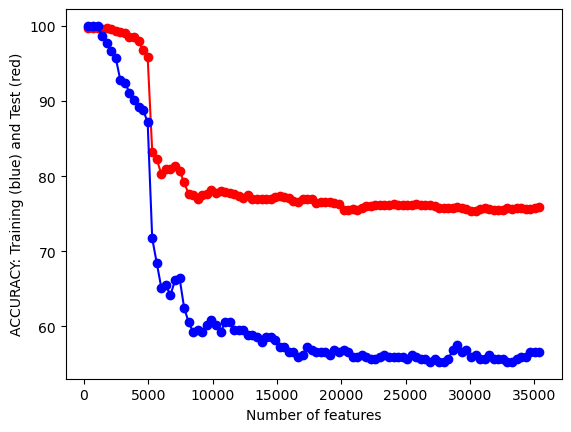

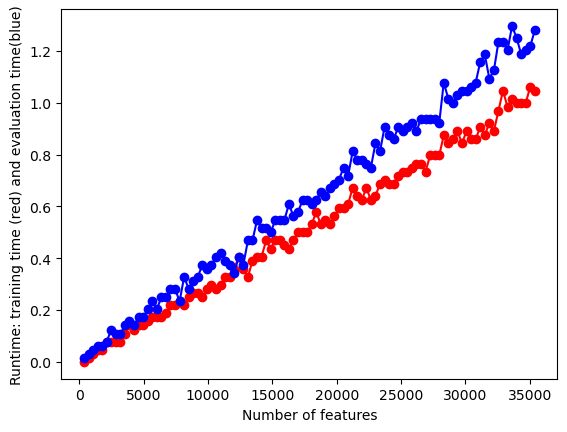

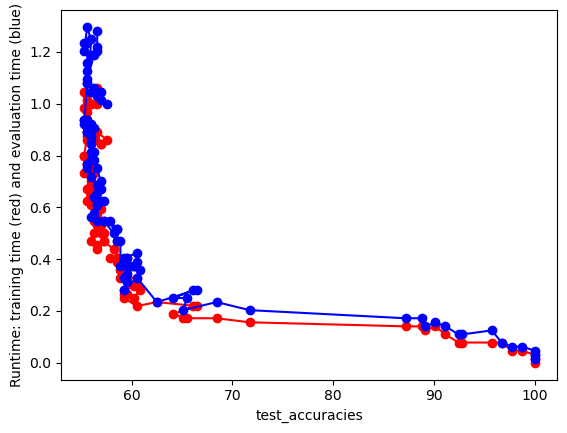

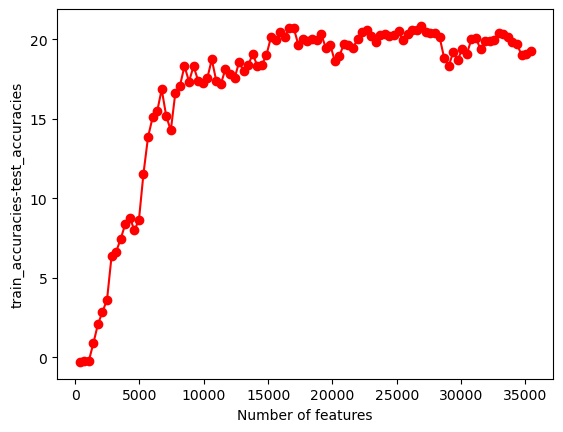

In [140]:
# More helper functions
import numpy as np
import matplotlib.pyplot as plt

def save_results(path_root):
    out= np.transpose(np.array([num_features,train_accuracies,test_accuracies,train_time,eval_time])) 
    out= pd.DataFrame(out)
    out.to_csv(path_root+".csv")



#UTILITY FUNCTION TO PLOT RESULTS
def plot_results(path_root):

    #PLOT-1
    plt.plot(num_features,train_accuracies,'-or')
    plt.plot(num_features,test_accuracies,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('ACCURACY: Training (blue) and Test (red)')
    plt.savefig(path_root+'-1.png')
    plt.show()

    # #PLOT-2
    plt.plot(num_features,train_time,'-or')
    plt.plot(num_features,eval_time,'-ob')
    plt.xlabel('Number of features')
    plt.ylabel('Runtime: training time (red) and evaluation time(blue)')
    plt.savefig(path_root+'-2.png')
    plt.show()

    # #PLOT-3
    plt.plot(np.array(test_accuracies),train_time,'-or')
    plt.plot(np.array(test_accuracies),eval_time,'-ob')
    plt.xlabel('test_accuracies')
    plt.ylabel('Runtime: training time (red) and evaluation time (blue)')
    plt.savefig(path_root+'-3.png')
    plt.show()

    # #PLOT-3
    plt.plot(num_features,np.array(train_accuracies)-np.array(test_accuracies),'-or')
    plt.xlabel('Number of features')
    plt.ylabel('train_accuracies-test_accuracies')
    plt.savefig(path_root+'-4.png')
    plt.show()


output_dir = "./"
save_results(output_dir+"/partial_grid_search")
plot_results(output_dir+"/partial_grid_search")


<h2> Feature selection for text data </h2>

<h2> Naive Bayes with Labeled Text Data </h2>